In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mirt import MIRT, JointMIRT

b5_df = pd.read_csv('big5.csv', low_memory=False)


In [12]:
vcl_params = pd.read_csv('vcl_params_2d.csv', low_memory=False)
tipi_params = pd.read_csv('tipi_params_2d.csv', low_memory=False)
riasec_params = pd.read_csv('riasec_params_2d.csv', low_memory=False)
big_5_params = pd.read_csv('big5_params_2d.csv', low_memory=False)

In [56]:
vcl_a = np.column_stack([vcl_params['a1'].values, vcl_params['a2'].values])
tipi_a = np.column_stack([tipi_params['a1'].values, tipi_params['a2'].values])
riasec_a = np.column_stack([riasec_params['a1'].values, riasec_params['a2'].values])
big_5_a = np.column_stack([big_5_params['a1'].values, big_5_params['a2'].values])

vcl_b = vcl_params['b'].values.reshape(-1, 1)
tipi_b = np.column_stack([tipi_params['b1'].values, tipi_params['b2'].values,
                          tipi_params['b3'].values, tipi_params['b4'].values,
                          tipi_params['b5'].values, tipi_params['b6'].values])
riasec_b = np.column_stack([riasec_params['b1'].values, riasec_params['b2'].values,
                            riasec_params['b3'].values, riasec_params['b4'].values])
big_5_b = np.column_stack([big_5_params['b1'].values, big_5_params['b2'].values,
                          big_5_params['b3'].values, big_5_params['b4'].values])

In [63]:
riasec_name =[cat+str(num)+'_riasec' for cat in ['R', 'I', 'A', 'S', 'E', 'C'] for num in range(1, 9)]
big5_name = [cat+str(num)+'_big5' for cat in ['E', 'N', 'A', 'C', 'O'] for num in range(1, 11)]

In [64]:
data_to_store ={
    'item_id': list(range(74+50)),
    'item_type': ['likert']*58+['binary']*16+['likert']*50,
    'a': riasec_a.tolist() + tipi_a.tolist() + vcl_a.tolist() + big_5_a.tolist(),
    'b': riasec_b.tolist() + tipi_b.tolist() + vcl_b.tolist() + big_5_b.tolist(),
    'item_name': riasec_name + ['TIPI'+str(i) for i in range(1, 11)]+['VCL'+str(i) for i in range(1, 17)]+big5_name,
}

In [65]:
import json
with open('data_final.json', 'w') as f:
    json.dump([{
        'item_id': data_to_store['item_id'][idx],
        'item_type': data_to_store['item_type'][idx],
        'a': data_to_store['a'][idx],
        'b': data_to_store['b'][idx],
        'item_name': data_to_store['item_name'][idx]
    } for idx in range(74+50)], f, indent=4)

In [ ]:
riasec_name = [cat+str(num) for cat in ['R', 'I', 'A', 'S', 'E', 'C'] for num in range(1, 9)]

combined = pd.DataFrame({
    'item_id': list(range(74)),
    'item_type': ['likert']*58+['binary']*16,
    'a': list(riasec_a)+list(tipi_a)+list(vcl_a),
    'b': list(riasec_b)+list(tipi_b)+list(vcl_b),
    'item_name': riasec_name+['TIPI'+str(i) for i in range(1, 11)]+['VCL'+str(i) for i in range(1, 17)]
})

MIRT(
  (item_model): OnePLModel()
)

In [15]:
theta = mirt.theta.detach().numpy()
b = mirt.item_model.b.detach().numpy()

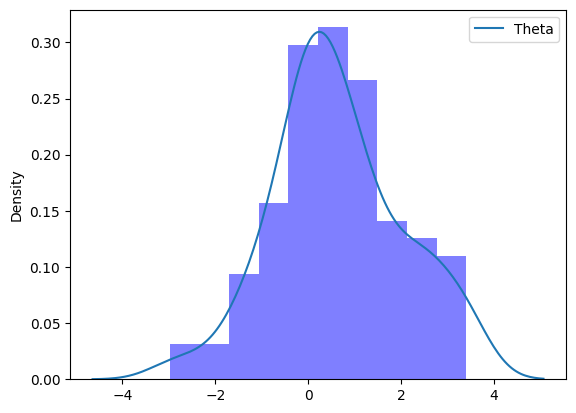

In [18]:
fig, ax = plt.subplots()
sns.kdeplot(theta, ax=ax, label='Theta', color='blue')
plt.hist(theta, bins='auto', density=True, alpha=0.5, color='blue')
plt.legend()
plt.show()

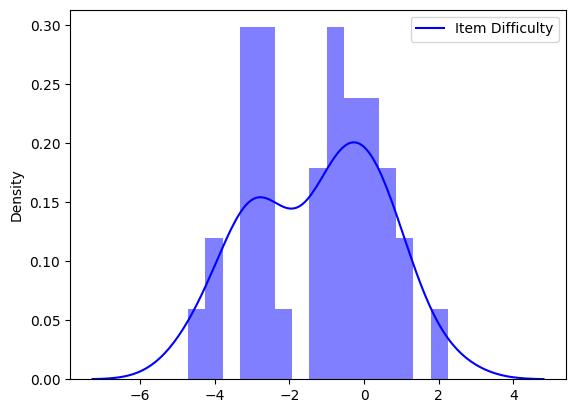

In [ ]:
fig, ax = plt.subplots()
plt.hist(b, bins=15, density=True, alpha=0.5, color='blue')
sns.kdeplot(b, ax=ax, label='Item Difficulty', color='blue')
plt.legend()
plt.show()

In [33]:
raw = MIRT(responses.shape[0], responses.shape[1], n_dims=1, n_categories=6) # 0 as missing
raw.specify_model(model_type="GPCM")
raw.fit(responses, n_epochs=200, lr=0.01)

raw_theta = raw.theta.detach().numpy()
raw_a = raw.item_model.a.detach().numpy()
raw_b = raw.item_model.b.detach().numpy()

clean = MIRT(cleaned_responses.shape[0], cleaned_responses.shape[1], n_dims=1, n_categories=5) # removed 0
clean.specify_model(model_type="GPCM")
clean.fit(cleaned_responses-1, n_epochs=500, lr=0.01)

clean_theta = clean.theta.detach().numpy()
clean_a = clean.item_model.a.detach().numpy()
clean_b = clean.item_model.b.detach().numpy()

NameError: name 'raw_theta' is not defined

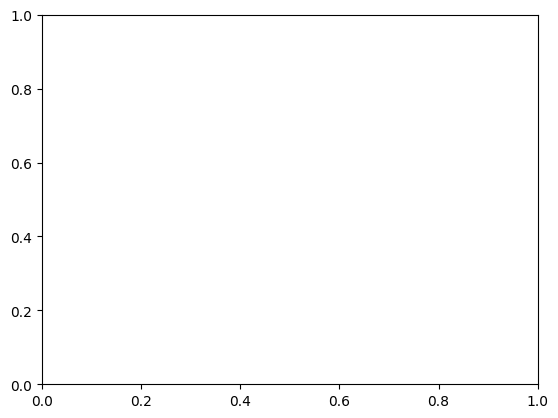

In [52]:
fig, ax = plt.subplots()

r_mu, r_std = np.mean(raw_theta), np.std(raw_theta)
c_mu, c_std = np.mean(clean_theta), np.std(clean_theta)
raw_theta = (raw_theta - r_mu) / r_std
clean_theta = (clean_theta - c_mu) / c_std

sns.kdeplot(raw_theta, color='orange', ax=ax, fill=True, alpha=0.5, label='Raw Data')
sns.kdeplot(clean_theta, color='red',ax=ax, alpha=0.5, label='Cleaned Data')

plt.legend()
plt.show()

In [2]:
mirt = MIRT(n_students, n_riasec_items, n_dims=1, n_categories=n_riasec_categories)
mirt.specify_model(model_type="GPCM")
mirt.fit(riasec_df.values-1, n_epochs=500, lr=0.01)

single_theta = mirt.theta.detach().numpy()
single_a = mirt.item_model.a.detach().numpy()
single_b = mirt.item_model.b.detach().numpy()

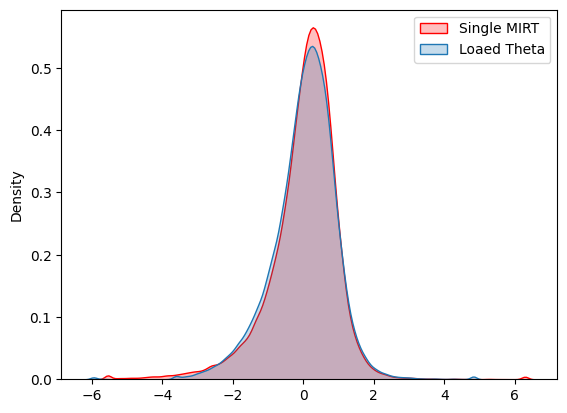

In [3]:
theta_df = pd.read_csv('thetas.csv')
theta_from_df = theta_df.values
fig, ax = plt.subplots()

single_theta = single_theta.squeeze()
single_theta -= single_theta.mean()
single_theta /= single_theta.std()

sns.kdeplot(single_theta, ax=ax ,label='Single MIRT', color='red', fill=True)
sns.kdeplot(theta_from_df, ax=ax, label='Loaed Theta', color='blue', fill=True)
plt.legend()
plt.show()

In [4]:
jmirt = JointMIRT(n_students, n_dims=1)
jmirt.add_model("GPCM", n_items=n_riasec_items, n_categories=n_riasec_categories)
jmirt.add_model("GPCM", n_items=n_tipi_items, n_categories=n_tipi_categories)
jmirt.add_model("2PL", n_items=n_vcl_items)

jmirt.fit(combined_responses, n_epochs=500, lr=0.01)

Training Joint MIRT:   0%|          | 0/500 [00:00<?, ?it/s]

JointMIRT(
  (item_models): ModuleList(
    (0-1): 2 x GPCMModel()
    (2): TwoPLModel()
  )
)

In [33]:
riasec_a = jmirt.item_models[0].a.detach().numpy()
riasec_b = jmirt.item_models[0].b.detach().numpy()
tipi_a = jmirt.item_models[1].a.detach().numpy()
tipi_b = jmirt.item_models[1].b.detach().numpy()
vcl_a = jmirt.item_models[2].a.detach().numpy()
vcl_b = jmirt.item_models[2].b.detach().numpy()

In [36]:
riasec_prarms = pd.DataFrame(np.concatenate([riasec_a, riasec_b], axis=1), columns=['a', 'b1', 'b2', 'b3', 'b4'])
tipi_prarms = pd.DataFrame(np.concatenate([tipi_a, tipi_b], axis=1), columns=['a', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6'])
vcl_prarms = pd.DataFrame(np.column_stack([vcl_a, vcl_b]), columns=['a', 'b'])

vcl_prarms.to_csv('vcl_params.csv', index=False)
tipi_prarms.to_csv('tipi_params.csv', index=False)
riasec_prarms.to_csv('riasec_params.csv', index=False)

In [31]:
joint_theta = jmirt.theta.detach().numpy().squeeze()
mu = joint_theta.mean()
sigma = joint_theta.std()
joint_theta_norm = (joint_theta - mu) / sigma
pd.DataFrame(single_theta, columns=['theta']).to_csv('single_theta.csv', index=False)
pd.DataFrame(joint_theta, columns=['theta']).to_csv('joint_theta.csv', index=False)
pd.DataFrame(joint_theta_norm, columns=['theta']).to_csv('joint_theta_norm.csv', index=False)

def a_norm(a, sigma):
    return a * sigma
def gpcm_b_norm(b, a, mu, sigma):
    T = np.cumsum(b, axis=1)
    T = np.concatenate([np.zeros((T.shape[0], 1)), T], axis=1)
    T_norm = np.zeros_like(T)
    for c in range(T.shape[1]):
        T_norm[:, c] = (T[:, c] - c * a.squeeze() * mu) / sigma
    return np.diff(T_norm, axis=1)

riasec_a_norm = a_norm(riasec_a, sigma)
riasec_b_norm = gpcm_b_norm(riasec_b, riasec_a, mu, sigma)
tipi_a_norm = a_norm(tipi_a, sigma)
tipi_b_norm = gpcm_b_norm(tipi_b, tipi_a, mu, sigma)
vcl_a_norm = a_norm(vcl_a, sigma)
vcl_b_norm = (vcl_b - mu) / sigma

In [32]:
riasec_norm_params = pd.DataFrame(np.concatenate([riasec_a_norm, riasec_b_norm], axis=1), columns=['a', 'b1', 'b2', 'b3', 'b4'])
tipi_norm_params = pd.DataFrame(np.concatenate([tipi_a_norm, tipi_b_norm], axis=1), columns=['a', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6'])
vcl_norm_params = pd.DataFrame(np.column_stack([vcl_a_norm, vcl_b_norm]), columns=['a', 'b'])

vcl_norm_params.to_csv('vcl_norm_params.csv', index=False)
tipi_norm_params.to_csv('tipi_norm_params.csv', index=False)
riasec_norm_params.to_csv('riasec_norm_params.csv', index=False)

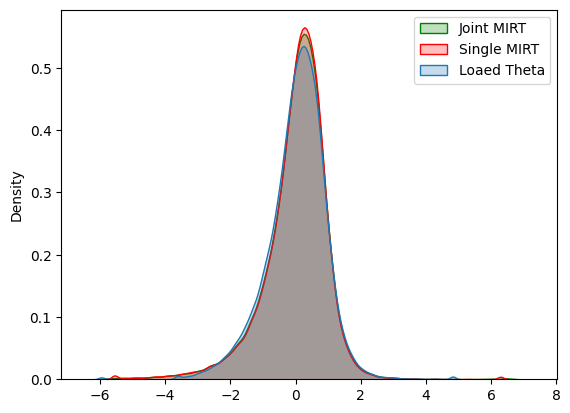

In [30]:
fig, ax = plt.subplots()
sns.kdeplot(joint_theta_norm, ax=ax, label='Joint MIRT', color='green', fill=True)
sns.kdeplot(single_theta, ax=ax ,label='Single MIRT', color='red', fill=True)
sns.kdeplot(theta_from_df, ax=ax, label='Loaed Theta', color='blue', fill=True)
plt.legend()
plt.show()


In [47]:
a

array([0.60046395, 0.58386112, 0.57463879, 0.65672251, 0.92233382,
       0.68541399, 1.05658339, 0.75260801, 0.19993795, 0.22499376,
       0.2456604 , 0.27577349, 0.26164252, 0.26543406, 0.2766576 ,
       0.3621235 , 0.26832822, 0.26573055, 0.23353414, 0.2101195 ,
       0.18027413, 0.24646335, 0.29103151, 0.32201758, 0.29627682,
       0.25760717, 0.21803928, 0.3645051 , 0.22638123, 0.31140905,
       0.30487465, 0.34002491, 0.56502873, 0.55086092, 0.7144222 ,
       0.38863218, 0.61991643, 0.57198217, 0.48122447, 0.66009206,
       0.81254594, 0.96486336, 1.06960654, 0.9122826 , 0.68206916,
       0.77694471, 0.98779116, 1.29337457])

In [68]:
np.concatenate([riasec_a, single_a, a[..., np.newaxis]], axis=1).shape

(48, 3)

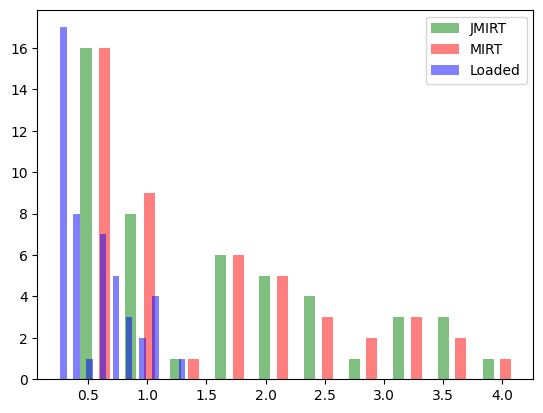

In [ ]:
item_pars = pd.read_csv('item_pars1.csv').values

a = item_pars[:, 0]
b = item_pars[:, 1:5]

combined_a = np.concatenate([riasec_a, single_a, a[..., np.newaxis]], axis=1)
label = ['JMIRT', 'MIRT', 'Loaded']
plt.hist(riasec_a.squeeze(), bins=10, alpha=0.5, label='JMIRT', color='green', align='left', rwidth=0.25)
plt.hist(single_a.squeeze(), bins=10, alpha=0.5, label='MIRT', color='red', align='mid', rwidth=0.25)
plt.hist(a, bins=10, alpha=0.5, label='Loaded', color='blue', align='right', rwidth=0.5)
plt.legend()
plt.show()